# Feature Engineering for Heart Disease Prediction

This notebook focuses on preparing the heart disease dataset for model training by applying various feature engineering techniques to enhance model performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Set the random seed for reproducibility
np.random.seed(42)

## Load and Inspect the Dataset

In [4]:
# Load the dataset
data = pd.read_csv('C:/Users/DELL/Desktop/heart-xai-chatbot/data/heart.csv')

# Make a copy of the data to avoid modifying the original
df = data.copy()

In [5]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nDescriptive Statistics:")
df.describe()

Dataset Shape: (918, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Descriptive Statistics:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Handle Missing Values

In [7]:
from sklearn.impute import SimpleImputer

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Since your dataset has only numerical features, we apply median imputation
numerical_imputer = SimpleImputer(strategy='median')

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Check again after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Missing values after handling:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Feature Engineering

Let's create some new features that might help the model.

In [9]:
import pandas as pd

# Create age groups
df['age_group'] = pd.cut(df['Age'], bins=[0, 40, 50, 60, 100], labels=[0, 1, 2, 3])

# Create cholesterol normalized (using 'Cholesterol' column)
df['chol_normalized'] = df['Cholesterol'] / df['Cholesterol'].mean()

# Create a feature for blood pressure category
def bp_category(x):
    if x < 120: return 0  # Normal
    elif x < 130: return 1  # Elevated
    elif x < 140: return 2  # Stage 1 hypertension
    else: return 3  # Stage 2 hypertension

df['bp_category'] = df['RestingBP'].apply(bp_category)

# Heart rate reserve (approximation)
df['max_heart_rate'] = 220 - df['Age']
df['heart_rate_reserve'] = df['max_heart_rate'] - df['MaxHR']
df['heart_rate_percentage'] = df['MaxHR'] / df['max_heart_rate']

# Interaction terms
df['age_chol_interaction'] = df['Age'] * df['chol_normalized']
df['exercise_bp_interaction'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1}) * df['bp_category']


## Feature Scaling

In [12]:
# Check column names to confirm the target column
print(df.columns)

# Separate features and target
X = df.drop('HeartDisease', axis=1)  # Target column is 'HeartDisease'
y = df['HeartDisease']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 
                           'MaxHR', 'Oldpeak']

# Scale the numerical features for training and test set
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

# You may want to encode the categorical columns if needed for any model you plan to use


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'age_group', 'chol_normalized', 'bp_category',
       'max_heart_rate', 'heart_rate_reserve', 'heart_rate_percentage',
       'age_chol_interaction', 'exercise_bp_interaction'],
      dtype='object')


## Save Processed Data

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Define categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Define numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # OneHotEncode categorical variables
])

# Create preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessor and RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

# Get feature importance
importances = model_pipeline.named_steps['classifier'].feature_importances_

# Get column names after one-hot encoding
encoded_feature_names = model_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(encoded_feature_names)

# Create a DataFrame to display the importance of each feature
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


              Feature  Importance
19        ST_Slope_Up    0.150948
5             Oldpeak    0.113274
2         Cholesterol    0.096225
4               MaxHR    0.089923
18      ST_Slope_Flat    0.083204
0                 Age    0.080382
15   ExerciseAngina_N    0.072656
16   ExerciseAngina_Y    0.065329
1           RestingBP    0.063082
8   ChestPainType_ASY    0.053019
6               Sex_F    0.024723
3           FastingBS    0.019172
7               Sex_M    0.018451
10  ChestPainType_NAP    0.013059
9   ChestPainType_ATA    0.013039
12     RestingECG_LVH    0.012509
13  RestingECG_Normal    0.010708
14      RestingECG_ST    0.008441
17      ST_Slope_Down    0.006308
11   ChestPainType_TA    0.005547


## Feature Importance Analysis

Let's use a simple model to get a preliminary idea of feature importance.

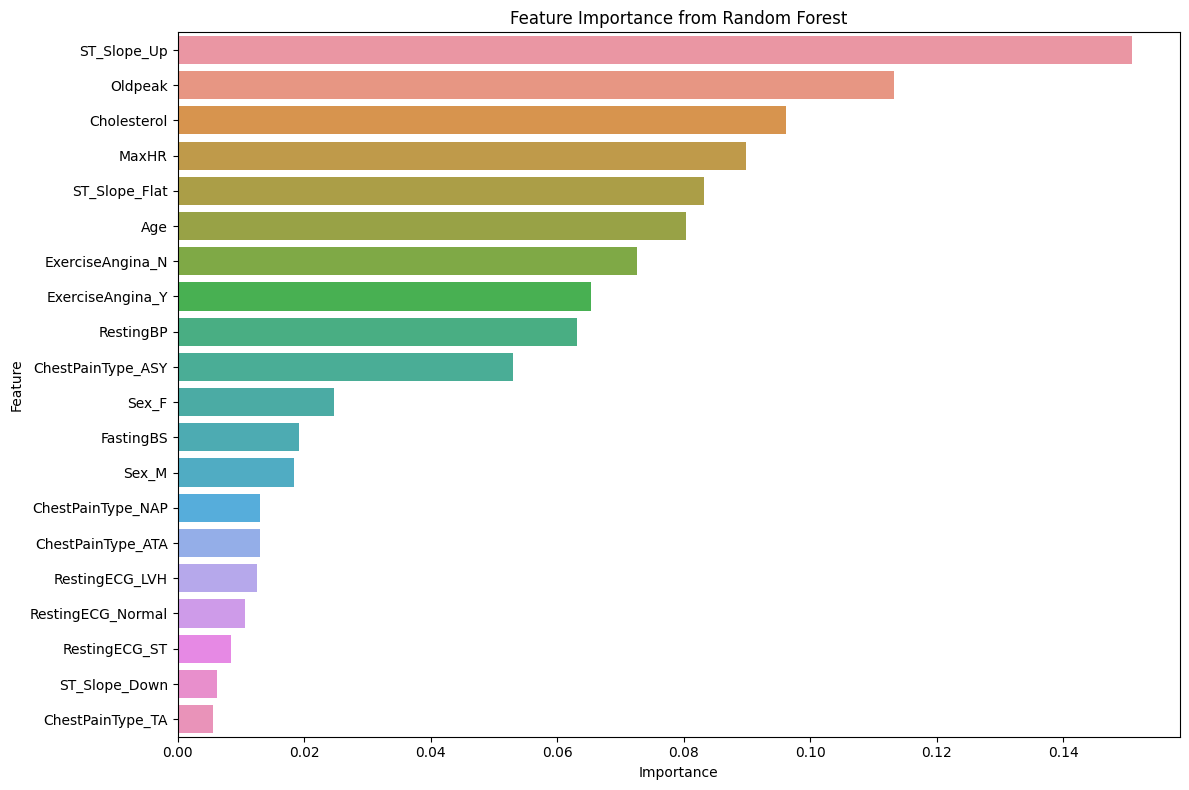

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Define categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Define numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # OneHotEncode categorical variables
])

# Create preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessor and RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

# Get feature importance from the model
importances = model_pipeline.named_steps['classifier'].feature_importances_

# Get column names after one-hot encoding
encoded_feature_names = model_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(encoded_feature_names)

# Create a DataFrame to display the importance of each feature
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()

# Save the plot
plt.savefig('C:/Users/DELL/Desktop/heart-xai-chatbot/data/processed/feature_importance.png')
plt.show()


## Conclusion

In this notebook, we performed feature engineering on the heart disease dataset to prepare it for model training. We:

1. Handled missing values
2. Created new features based on domain knowledge
3. Normalized numerical features
4. Split the data into training and testing sets
5. Analyzed feature importance

The processed data is now ready for model training in the next notebook.